**<font color = 'blue' size = 38>INTRODUCTION TO ML</font>**

# <font color = 'Orange'>Linear Regression for Sales</font>
link: https://www.kaggle.com/ashydv/advertising-dataset

## <font color = 'Orange'>Dataset</font>

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-05 Introduction to ML/advertising.csv')

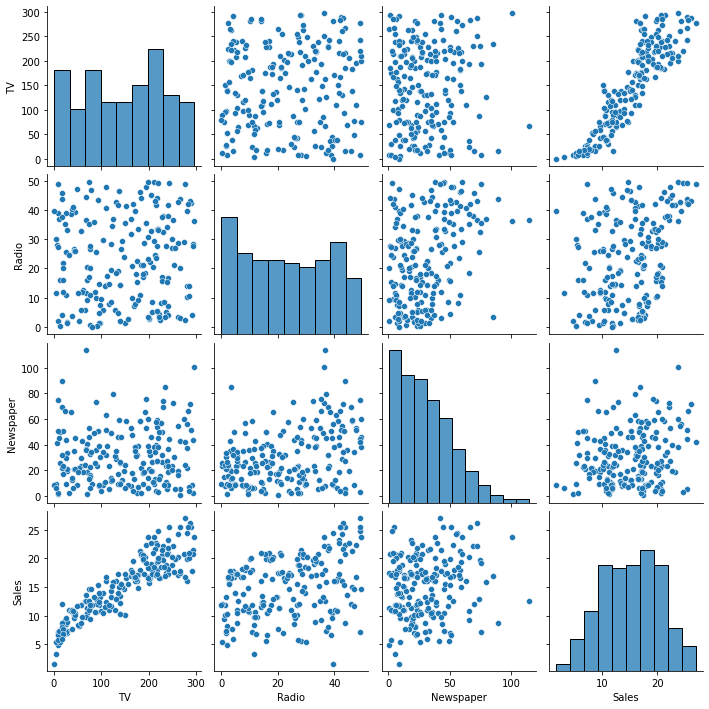

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# let's do a pairplot to visualize which variables are correlated with Sales the most

sns.pairplot(data)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]],  data['Sales'], test_size=0.2)

## <font color='Orange'>Scaling the values</font>


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## <font color = 'Orange'> Training the model </font>

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

## <font color = 'Orange'>Evaluating the model</font>

### <font color = 'Orange'> 𝑅² score </font>

In [10]:
r_sq = model.score(X_train, Y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8959966349845825


### <font color = 'Orange'>Intercept</font>

In [11]:
print('intercept:', model.intercept_)

intercept: 14.991874999999999


### <font color = 'Orange'>Slope</font>

In [12]:
print('slope:', model.coef_)

slope: [ 4.65769852  1.47857938 -0.00835049]


## <font color = 'Orange'>Prediction</font>

In [13]:
y_pred = model.predict(X_test)
y_pred

array([20.5180394 , 14.95903493, 20.05072038, 11.04448426, 18.84577013,
       18.06196226,  9.99929261, 17.15947168,  7.91638649, 24.65292334,
       12.597055  , 20.94242832, 14.63431634, 12.66794741, 19.17113698,
       15.3051153 ,  8.03262303, 16.83619397, 24.68114606, 10.86322612,
       13.81070373,  7.28693001, 13.04871912, 20.42974615, 21.65363081,
       10.66312533, 21.02969391, 17.17399902, 16.49663309, 18.5227138 ,
       12.64084339, 19.98757131,  7.92134221,  8.139761  ,  8.43612926,
       10.69253023, 18.03021019, 12.14312721, 21.27048527, 23.47033041])

# <font color = 'Orange'>Advanced Linear Regression With statsmodels</font>

## <font color = 'Orange'>Training and Evaluating the model</font>

In [14]:
import numpy as np
import statsmodels.api as sm

x = sm.add_constant(X_train)
model = sm.OLS(Y_train, x)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
results = model.fit()


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     448.0
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           2.03e-76
Time:                        00:58:43   Log-Likelihood:                -308.87
No. Observations:                 160   AIC:                             625.7
Df Residuals:                     156   BIC:                             638.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9919      0.134    112.271      0.000      14.728      15.256
x1             4.6577      0.134     34.849      0.000       4.394       4.922
x2             1.4786      0.142     10.393      0.000       1.198       1.760
x3            -0.0084      0.142     -0.059      0.953      -0.290       0.273
==============================================================================
Omnibus:                       16.812   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.036
Skew:                          -0.508   Prob(JB):                     3.00e-07
Kurtosis:                       4.864   Cond. No.                         1.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = 'Orange'>Prediction</font>

In [19]:
x = sm.add_constant(X_train)

y_pred = results.predict(x)
print(y_pred)

[12.99655039 16.31326385  9.60202158 12.39525991 18.82216279 10.72327116
 21.188467   12.13910608  9.01668259 10.14212257 12.38310784 13.82555691
 17.82378551 12.19143499 12.19515909 10.36337047 19.93214247 20.92063682
 20.66230615  8.86275129 21.13877529 17.79905833 16.70041704 21.66417442
  9.73954247 10.94351747 11.18069285  9.49975287 12.17456162 19.31745612
 10.22441795 23.64270827 13.78398072  8.69986483 18.17368593 13.75694187
 23.21095698  9.63371468  9.84225689 13.29337942 18.22211227 16.80953894
 20.92954897 11.22227531 17.36108012 20.06103868 13.77928106 11.86487978
 10.14496695 19.42037535 14.79324977 18.66666344 15.8672774  22.87284946
 17.25050747  7.1360684  13.04313244 24.44207043 21.90246111 15.18471974
 20.97908285 21.36558894 12.56729411 15.14261019 10.20470436 11.50556211
 10.24502085 21.32155441  9.4638659  14.26538758 10.11808491 18.83537523
 14.20423888 12.0397862  17.73495469 20.67135949 23.98252779 16.92684915
  9.61427419  7.27022802 16.51144264 10.50735249 20

# <font color = 'Orange'>KNN Classification & Logistic Regression</font>

Link: https://www.kaggle.com/itsmesunil/bank-loan-modelling

## <font color = 'Orange'> Dataset</font>

In [20]:
data = pd.read_csv('/content/drive/My Drive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-05 Introduction to ML/Bank_Personal_Loan_Modelling.csv')

In [21]:
data.head()

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

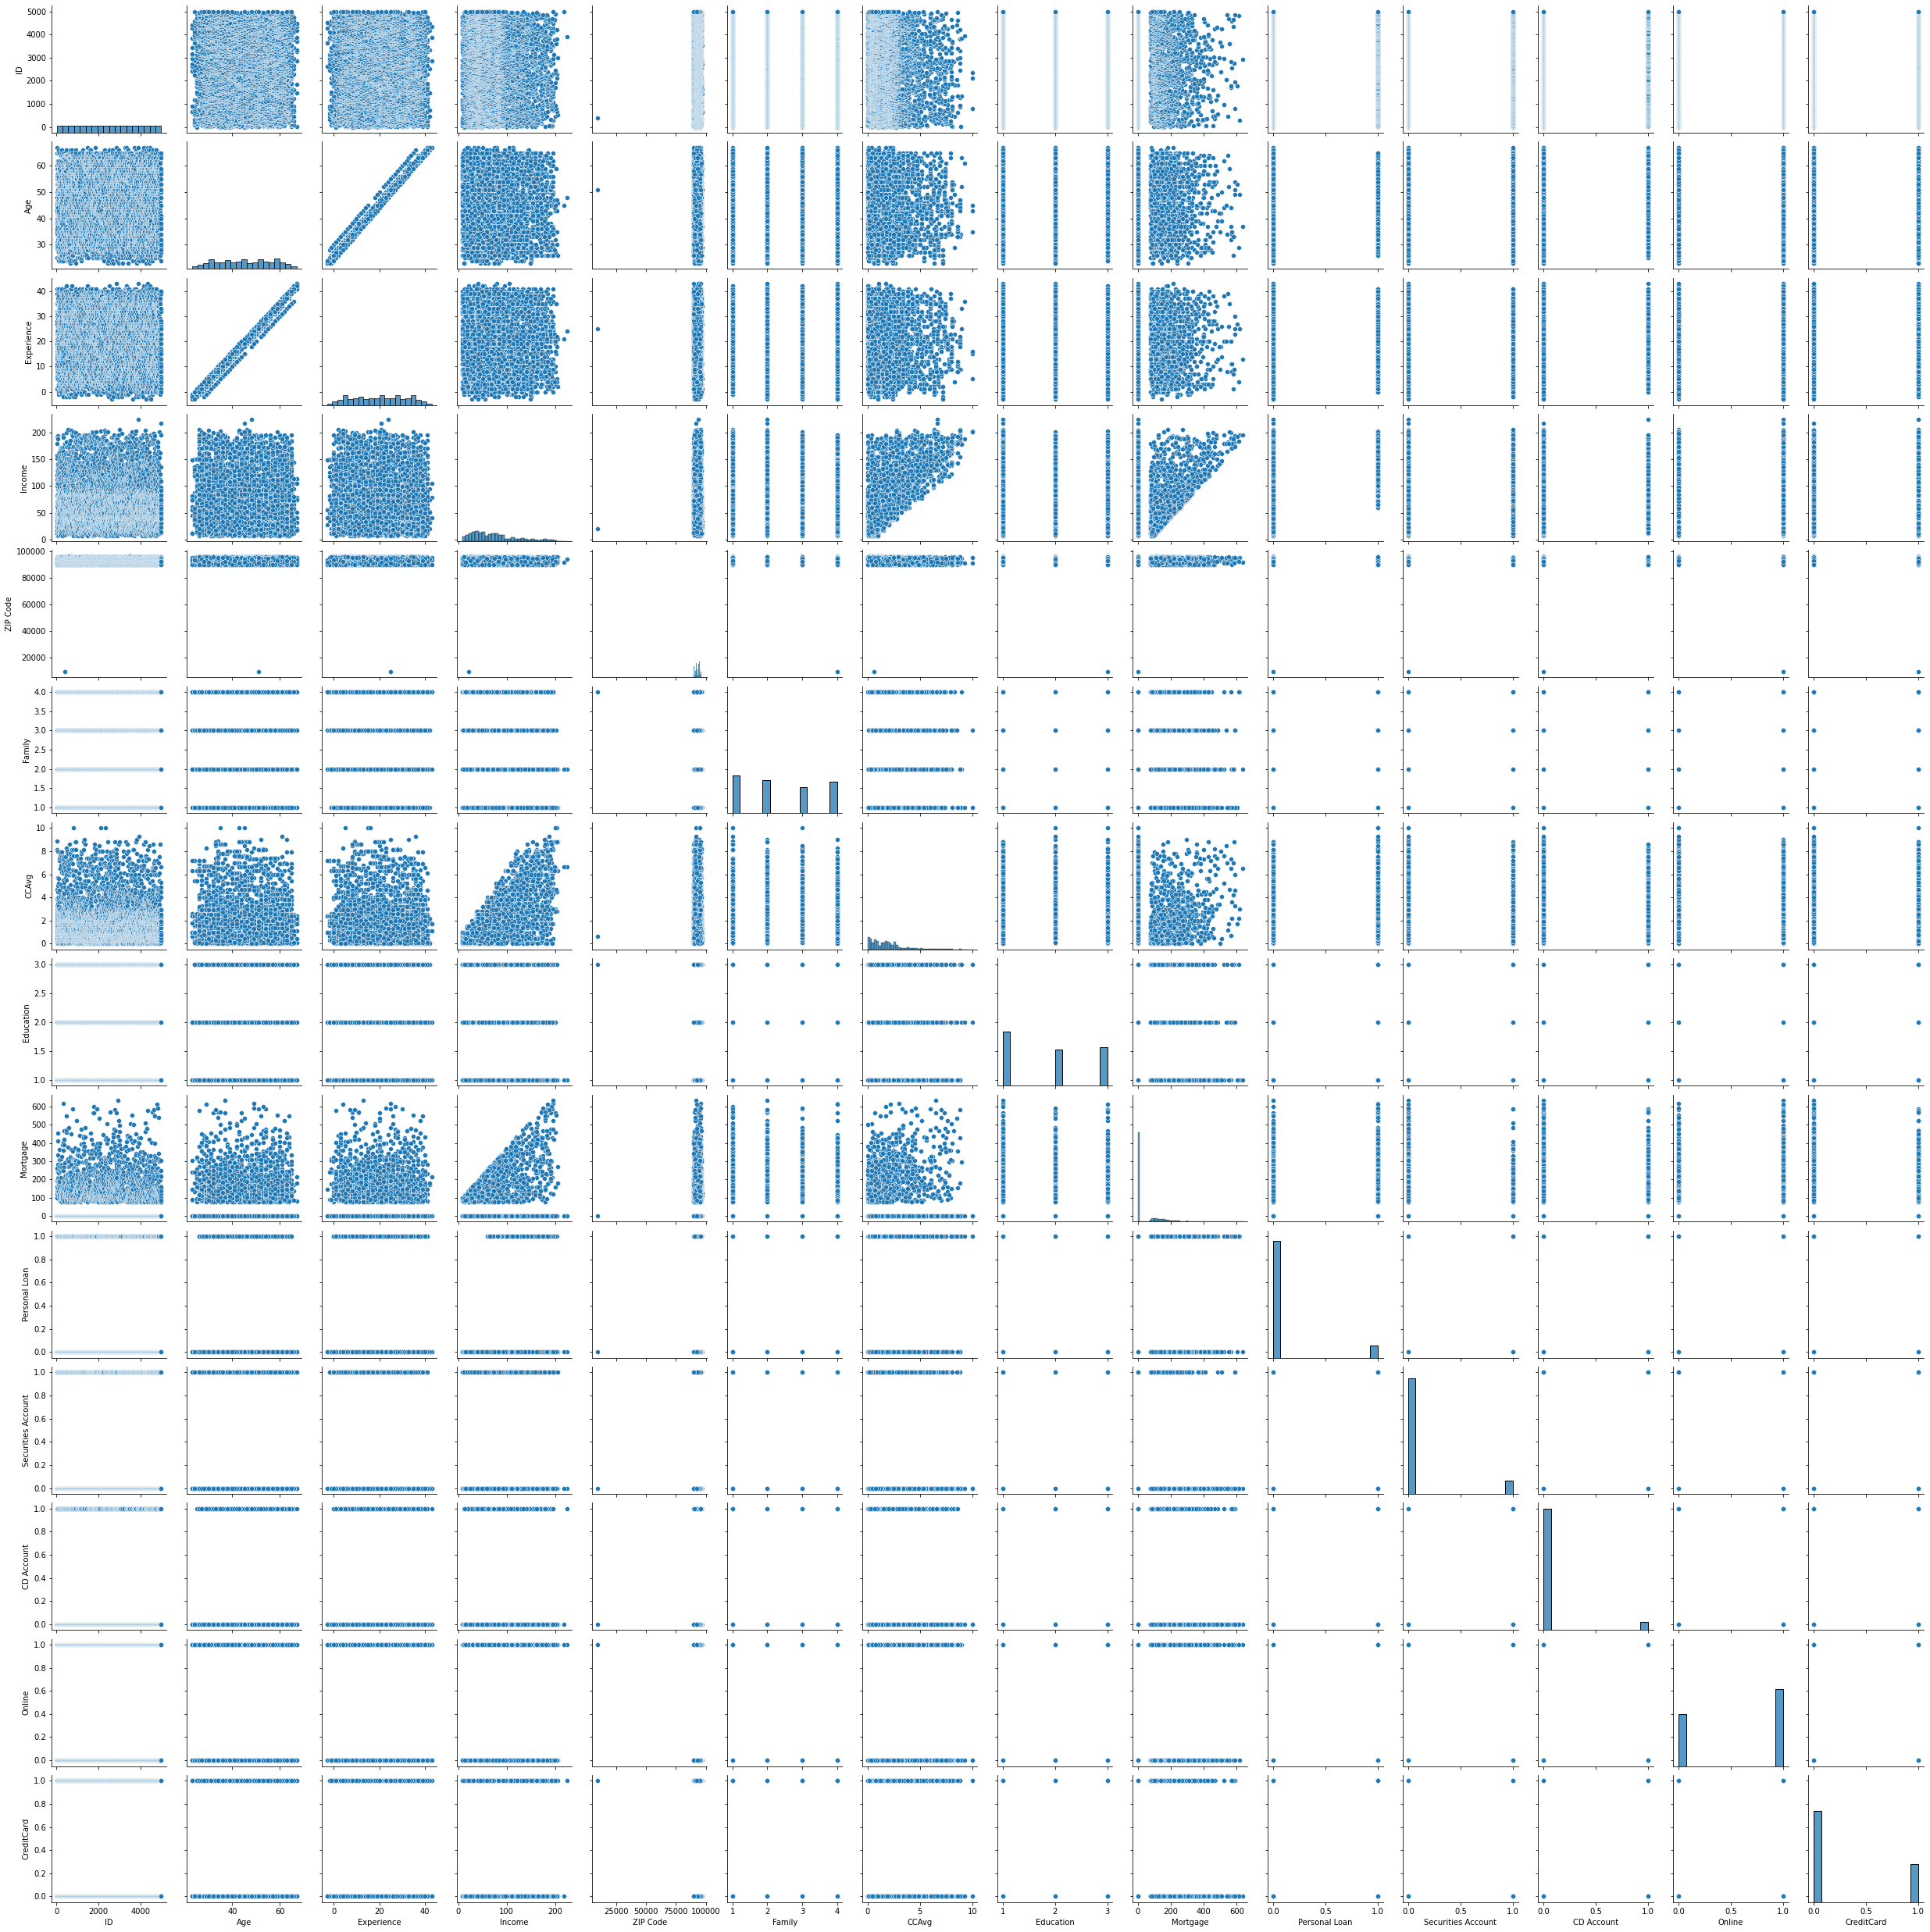

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# let's do a pairplot to visualize which variables are correlated with Sales the most

sns.pairplot(data)

In [23]:
t = data.copy()
t.drop('Personal Loan', axis='columns', inplace=True)




In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    t[t.columns[1:]],  data['Personal Loan'], test_size=0.2)

In [25]:
X_train.shape

(4000, 12)

In [26]:
Y_train.shape

(4000,)

## <font color = 'Orange'> Scaling the values</font>

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)


In [28]:
X_test = scaler.transform(X_test)

## <font color = 'Orange'>Prediction model - KNN </font>

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[899   1]
 [ 49  51]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       900
           1       0.98      0.51      0.67       100

    accuracy                           0.95      1000
   macro avg       0.96      0.75      0.82      1000
weighted avg       0.95      0.95      0.94      1000



## <font color = 'Orange'>Prediction model - Logistic regression</font>

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 15000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=15000)

In [33]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[888  12]
 [ 43  57]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       900
           1       0.83      0.57      0.67       100

    accuracy                           0.94      1000
   macro avg       0.89      0.78      0.82      1000
weighted avg       0.94      0.94      0.94      1000



## <font color = 'Orange'>Without ZIP Code Column</font>

In [35]:
t = data.copy()
t.drop('Personal Loan', axis='columns', inplace=True)
t.drop('ZIP Code', axis='columns', inplace=True)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    t[t.columns[1:]],  data['Personal Loan'], test_size=0.2)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### <font color = 'Orange'>Prediction model - KNN</font>

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[911   4]
 [ 27  58]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       915
           1       0.94      0.68      0.79        85

    accuracy                           0.97      1000
   macro avg       0.95      0.84      0.89      1000
weighted avg       0.97      0.97      0.97      1000



### <font color = 'Orange'>Prediction model - Logistic regression </font>

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 15000)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[897  18]
 [ 27  58]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       915
           1       0.76      0.68      0.72        85

    accuracy                           0.95      1000
   macro avg       0.87      0.83      0.85      1000
weighted avg       0.95      0.95      0.95      1000

